                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:19:29   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9861.0292   1

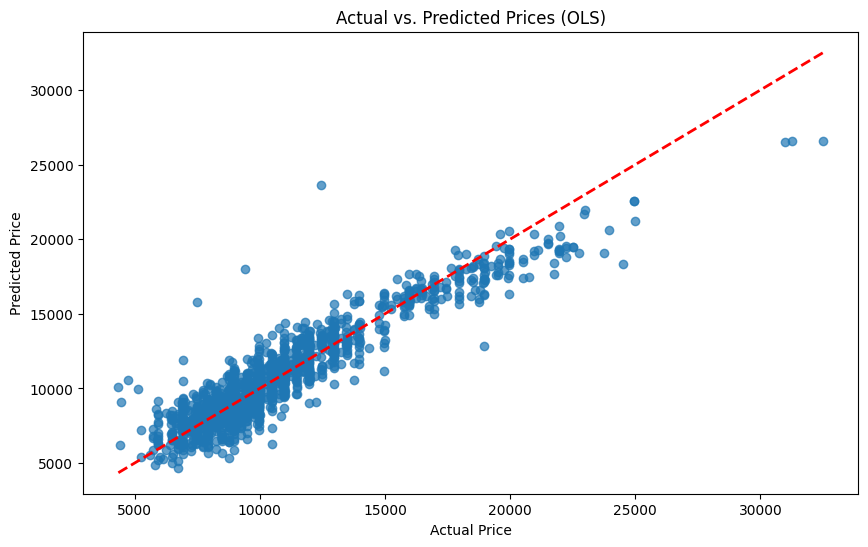


OLS Model R-squared: 0.86


In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('ToyotaCorolla - MLR.csv')

#Data Preprocessing ---
#Drop 'Cylinders' column as it has no variance
df_clean = df.drop('Cylinders', axis=1)

#Build and Fit OLS Model ---
# statsmodels handles categorical variables (like 'Fuel_Type') automatically
# by creating dummy variables and managing the multicollinearity (dummy variable trap).
formula = 'Price ~ Age_08_04 + KM + Fuel_Type + HP + Automatic + cc + Doors + Gears + Weight'

#OLS model
model_ols = smf.ols(formula=formula, data=df_clean)

# Fit model
results_ols = model_ols.fit()
print(results_ols.summary())

#Visualize Predicted vs. Actual Prices (using statsmodels' predictions) ---

df_clean['Predicted_Price'] = results_ols.predict(df_clean)

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Price'], df_clean['Predicted_Price'], alpha=0.7)
plt.plot([df_clean['Price'].min(), df_clean['Price'].max()],
         [df_clean['Price'].min(), df_clean['Price'].max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (OLS)')
plt.show()

#Extract R-squared
print(f"\nOLS Model R-squared: {results_ols.rsquared:.2f}")

Original DataFrame head after dropping 'Cylinders':

| Price   | Age_08_04   | KM    | Fuel_Type   | HP   | Automatic   | cc   | Doors   | Gears   | Weight   |
|:--------|:------------|:------|:------------|:-----|:------------|:-----|:--------|:--------|:---------|
| 13500   | 23          | 46986 | Diesel      | 90   | 0           | 2000 | 3       | 5       | 1165     |
| 13750   | 23          | 72937 | Diesel      | 90   | 0           | 2000 | 3       | 5       | 1165     |
| 13950   | 24          | 41711 | Diesel      | 90   | 0           | 2000 | 3       | 5       | 1165     |
| 14950   | 26          | 48000 | Diesel      | 90   | 0           | 2000 | 3       | 5       | 1165     |
| 13750   | 30          | 38500 | Diesel      | 90   | 0           | 2000 | 3       | 5       | 1170     |

DataFrame head for scikit-learn models (after one-hot encoding Fuel_Type):

| Age_08_04   | KM    | HP   | Automatic   | cc   | Doors   | Gears   | Weight   | Fuel_Type_Diesel   | Fuel_Type_Petrol 

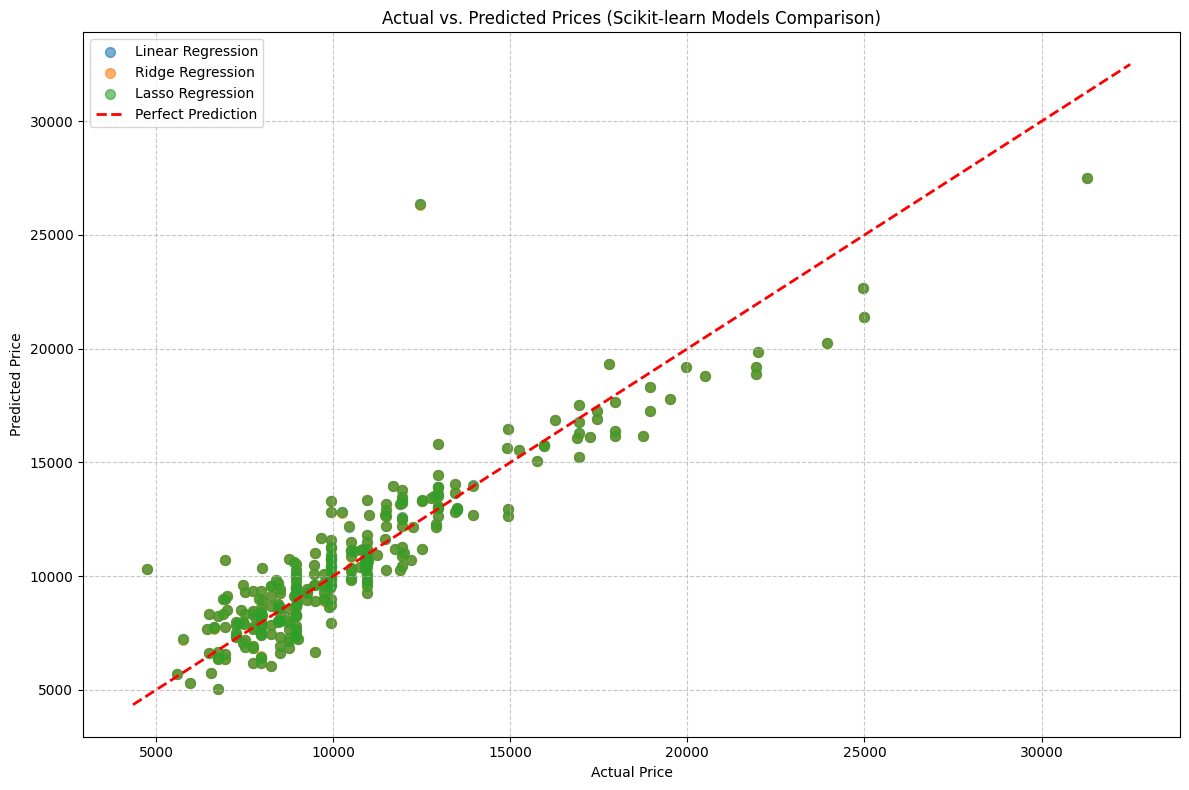

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Lasso and ridge
from sklearn.metrics import r2_score # Keeping R-squared for model comparison
import statsmodels.formula.api as smf # For OLS model with detailed summary

# ---Load and Preprocess the Dataset ---
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Drop 'Cylinders' column as it has no variance and isn't useful for modeling
df = df.drop('Cylinders', axis=1)

print("Original DataFrame head after dropping 'Cylinders':\n")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# --- Prepare data for scikit-learn models (manual one-hot encoding) ---
df_encoded_sklearn = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Define features (X) and target (y) for scikit-learn models
X_sklearn = df_encoded_sklearn.drop('Price', axis=1)
y_sklearn = df_encoded_sklearn['Price']

# --- Prepare data for statsmodels (keeps Fuel_Type as categorical) ---
df_for_statsmodels = df.copy()

print("\nDataFrame head for scikit-learn models (after one-hot encoding Fuel_Type):\n")
print(X_sklearn.head().to_markdown(index=False, numalign="left", stralign="left"))

# ---Split the Dataset into Training and Testing Sets
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(
    X_sklearn, y_sklearn, test_size=0.2, random_state=42
)

# Splitting for statsmodelss
df_train_sm, df_test_sm = train_test_split(
    df_for_statsmodels, test_size=0.2, random_state=42
)

print(f"\nTraining set size (scikit-learn): {X_train_sk.shape[0]} samples")
print(f"Testing set size (scikit-learn): {X_test_sk.shape[0]} samples")

# --Build Multiple Linear Regression Models

# --- Model 1: Ordinary Least Squares (OLS) using statsmodels
print("\n--- Model 1: Ordinary Least Squares (OLS) using statsmodels ---")

# Define the formula for the OLS model
formula_ols = 'Price ~ Age_08_04 + KM + C(Fuel_Type) + HP + Automatic + cc + Doors + Gears + Weight'

# Create and fit the OLS model using the training data for statsmodels
model_ols = smf.ols(formula=formula_ols, data=df_train_sm)
results_ols = model_ols.fit()

# Print the Summary
print(results_ols.summary())

# Evaluate the model on the testing data
y_pred_ols = results_ols.predict(df_test_sm)
r2_ols_test = r2_score(df_test_sm['Price'], y_pred_ols)
print(f"\nR-squared for Model 1 (OLS) on Testing Data: {r2_ols_test:.2f}")


# --- Model 2: Simple Linear Regression using scikit-learn
print("\n--- Model 2: Simple Linear Regression using scikit-learn ---")

# Initialize and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_sk, y_train_sk)

# predictions on the test set
y_pred_lr = model_lr.predict(X_test_sk)

# Evaluate the model
r2_lr = r2_score(y_test_sk, y_pred_lr)

print(f"R-squared for Model 2 (Linear Regression) on Testing Data: {r2_lr:.2f}")

# Display coefficients
lr_coefficients = pd.DataFrame({'Feature': X_train_sk.columns, 'Coefficient': model_lr.coef_})
print("\nModel 2 (Linear Regression) Coefficients:\n")
print(lr_coefficients.to_markdown(index=False, numalign="left", stralign="left"))
print(f"Model 2 (Linear Regression) Intercept: {model_lr.intercept_:.2f}")


# --- Model 3: Ridge Regression using scikit-learn
print("\n--- Model 3: Ridge Regression using scikit-learn ---")
print("Ridge Regression adds L2 regularization to prevent overfitting and handle multicollinearity by shrinking coefficients towards zero.")

# Initialize and train the Ridge Regression model
model_ridge = Ridge(alpha=1.0, random_state=42) # Added random_state for reproducibility
model_ridge.fit(X_train_sk, y_train_sk)

# Make predictions on the test set
y_pred_ridge = model_ridge.predict(X_test_sk)

# Evaluate the model
r2_ridge = r2_score(y_test_sk, y_pred_ridge)

print(f"R-squared for Model 3 (Ridge Regression, alpha=1.0) on Testing Data: {r2_ridge:.2f}")

# Display coefficients
ridge_coefficients = pd.DataFrame({'Feature': X_train_sk.columns, 'Coefficient': model_ridge.coef_})
print("\nModel 3 (Ridge Regression) Coefficients:\n")
print(ridge_coefficients.to_markdown(index=False, numalign="left", stralign="left"))
print(f"Model 3 (Ridge Regression) Intercept: {model_ridge.intercept_:.2f}")


# --- Model 4: Lasso Regression using scikit-learn (L1 Regularization) ---
print("\n--- Model 4: Lasso Regression using scikit-learn ---")
print("Lasso Regression adds L1 regularization which can lead to sparse models, effectively performing feature selection by shrinking some coefficients to exactly zero.")

# Initialize and train the Lasso Regression model
model_lasso = Lasso(alpha=0.1, random_state=42, max_iter=2000) # Using a small alpha to start; adjust as needed
model_lasso.fit(X_train_sk, y_train_sk)

# Make predictions on the test set
y_pred_lasso = model_lasso.predict(X_test_sk)

# Evaluate the model
r2_lasso = r2_score(y_test_sk, y_pred_lasso)

print(f"R-squared for Model 4 (Lasso Regression, alpha=0.1) on Testing Data: {r2_lasso:.2f}")

# Display coefficients
lasso_coefficients = pd.DataFrame({'Feature': X_train_sk.columns, 'Coefficient': model_lasso.coef_})
print("\nModel 4 (Lasso Regression) Coefficients:\n")
print(lasso_coefficients.to_markdown(index=False, numalign="left", stralign="left"))
print(f"Model 4 (Lasso Regression) Intercept: {model_lasso.intercept_:.2f}")

# -Model Performance Comparison ---
print("\n--- Consolidated Model Performance (R-squared on Testing Data) ---")
print(f"1. OLS (statsmodels): {r2_ols_test:.2f}")
print(f"2. Linear Regression (scikit-learn): {r2_lr:.2f}")
print(f"3. Ridge Regression (scikit-learn, alpha=1.0): {r2_ridge:.2f}")
print(f"4. Lasso Regression (scikit-learn, alpha=0.1): {r2_lasso:.2f}")


# -Visualize Predicted vs. Actual Prices for all scikit-learn models -
plt.figure(figsize=(12, 8))
plt.scatter(y_test_sk, y_pred_lr, alpha=0.6, label='Linear Regression', s=50)
plt.scatter(y_test_sk, y_pred_ridge, alpha=0.6, label='Ridge Regression', s=50)
plt.scatter(y_test_sk, y_pred_lasso, alpha=0.6, label='Lasso Regression', s=50) # Added Lasso
plt.plot([y_sklearn.min(), y_sklearn.max()], [y_sklearn.min(), y_sklearn.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Scikit-learn Models Comparison)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis Summary**

Four different multiple linear regression models were built and evaluated:

Ordinary Least Squares (OLS) using statsmodels: This model provided a detailed statistical summary, indicating the significance and impact of each feature on the car's price.

Linear Regression using scikit-learn: A standard linear model was built, providing a baseline for prediction.

Ridge Regression using scikit-learn: This model incorporated L2 regularization, which helps to shrink coefficients, manage multicollinearity, and potentially improve generalization by preventing overfitting.

Lasso Regression using scikit-learn: This model used L1 regularization, which not only shrinks coefficients but can also force some to exactly zero, effectively performing feature selection.

All models demonstrated strong predictive power, with R-squared values on the testing data ranging from approximately 0.86 to 0.87, indicating that a large proportion of the variance in car prices can be explained by the included features. Features like Age_08_04 (age of the car), KM (kilometers driven), HP (horsepower), Gears, and Weight consistently showed significant impact on the price across the models. The regularization methods (Ridge and Lasso) provided slightly different coefficient magnitudes compared to standard linear regression, with Lasso notably reducing the impact of less influential features like 'Doors' and 'cc' by shrinking their coefficients close to zero.

**Interview Questions**

1.What is Normalization & Standardization and how is it helpful?

Normalization (often min-max scaling) rescales the features to a fixed range, typically between 0 and 1. It is performed by subtracting the minimum value of a feature and then dividing by the range (max - min) of that feature. Standardization (often Z-score normalization) rescales data to have a mean of 0 and a standard deviation of 1. It is achieved by subtracting the mean of the feature from each data point and then dividing by the standard deviation. Both techniques are helpful because many machine learning algorithms, especially those that calculate distances (like K-Nearest Neighbors, Support Vector Machines, K-Means clustering) or rely on gradient descent (like neural networks and linear regression), perform better or converge faster when features are on a similar scale. They prevent features with larger numerical ranges from disproportionately influencing the model, ensuring that all features contribute equally to the distance calculations or optimization processes.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can make it difficult to interpret the individual coefficients and reduce the statistical significance of independent variables. Several techniques can address this issue. Feature selection methods, such as removing one of the highly correlated variables, can be effective, especially if one variable is redundant. Principal Component Analysis (PCA) is another approach where correlated variables are transformed into a smaller set of uncorrelated components, which can then be used as predictors in the regression. Regularization methods, such as Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization), are widely used; Ridge shrinks the coefficients of correlated variables proportionally, while Lasso can shrink some coefficients to exactly zero, effectively performing feature selection and removing less important correlated features from the model. Increasing the sample size, if feasible, can also sometimes mitigate the impact of multicollinearity.
